In [91]:
import scipy.io as sio # load matlab file
from scipy import signal # 2d convolve

from skimage import color
from skimage import io

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # load img

from PIL import Image

import torch.nn as nn
from torch.autograd import Variable


# (i)
### load filter (in matlab file format)

In [5]:
filter_bank = sio.loadmat("./data/Problem2/filterBank.mat")
filter_bank["F"].shape

### grayscale

In [126]:
# trans to grayscale
# img = Image.open('./data/Problem2/mountain.jpg').convert('gray')
# img.save('./output/moun_gray.jpg')

img = color.rgb2gray(io.imread('./data/Problem2/zebra.jpg'));

# io.imsave(fname='./output/moun_gray.jpg',arr=img)
img.shape

(331, 640)

### symmetric padding and filtering

In [127]:
# convolution
# result = np.convolve(symtrc_pd_img, filter_bank["F"][:,:,0], 'valid')
# result.shape

result = None # init filter result

for idx in range(38):
    tmp = signal.convolve2d(img, filter_bank["F"][:,:,idx], boundary='symm', mode='same')
    tmp = tmp.reshape(331 * 640, 1)
    if idx==0:
        result = tmp
    else:
        result = np.concatenate((result, tmp), axis=1)

# result = np.array(result)
result.shape

(211840, 38)

### K-means

In [128]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=0, max_iter=1000).fit(result)

kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [129]:
texture_sgmnt = kmeans.labels_.reshape(331, 640)

### render

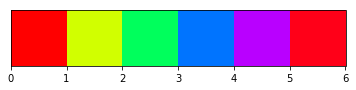

In [130]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def show_cmap(cmap, N):
    fig=plt.figure()
    ax=fig.add_subplot(111)   
    plt.axis('scaled')
    ax.set_xlim([ 0, N])
    ax.set_ylim([-0.5, 0.5])
    for i in range(N):
        rect = plt.Rectangle((i, -0.5), 1, 1, facecolor=cmap(i))
        ax.add_artist(rect)
    ax.set_yticks([])
    plt.show()

cmap = get_cmap(6)
show_cmap(cmap, 6)

In [131]:
plt.imsave("./output/zebra_texture_segmentation.jpg", texture_sgmnt, cmap=cmap)

# (ii) 

### RGB to Lab

In [132]:
lab = color.rgb2lab(io.imread('./data/Problem2/zebra.jpg'))
lab = lab.reshape(-1, 3)
lab.shape

(211840, 3)

# concatenate lab and filter result

In [133]:
result = np.concatenate((result, lab), axis=1)
result.shape

(211840, 41)

# K-means

In [134]:
# from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=0, max_iter=1000).fit(result)

kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [135]:
texture_sgmnt = kmeans.labels_.reshape(331, 640)
texture_sgmnt.shape

(331, 640)

# render

In [136]:
plt.imsave("./output/zebra_texture_segmentation_withLab.jpg", texture_sgmnt, cmap=cmap)